# Continuación clase de optimización de código

In [1]:
# Paquetes a utilizar
from functools import reduce
import numpy as np
import scipy.special as sps 
from itertools import cycle  # Librería para hacer ciclos

# Variables locales, globales y no locales

* ## Variable global

In [2]:
x = "global"

def foo():
    print("x inside :", x)

foo()
print("x outside:", x)

x inside : global
x outside: global


¿Qué sucede si intento asignar un valor a la variables x desde la función?

In [5]:
x = "global"

def foo():
    global x
    x = x * 2
    print(x)
foo()
print(x)

globalglobal
globalglobal


* ## Variable local

Intentando acceder a una variable local 

In [6]:
def foo():
    y = "local"

foo()
print(y)

NameError: name 'y' is not defined

Mostrando el valor de una variable local

In [7]:
def foo():
    y = "local"
    print(y)

foo()

local


**Variables locales y globales en el mismo código**

In [8]:
x = "global"

def foo():
    global x
    y = "local"
    x = x * 2
    print(x)
    print(y)
    
foo()

globalglobal
local


**Variables locales y globales con el mismo nombre**

In [9]:
x = 5

def foo():
    x = 10
    print("local x:", x)

foo()
print("global x:", x)

local x: 10
global x: 5


* ## Variables no locales

Crear una variable no local

In [10]:
def outer():
    x = "local"
    
    def inner():
        nonlocal x
        x = "nonlocal"
        print("inner:", x)
    
    inner()
    print("outer:", x)

outer()

inner: nonlocal
outer: nonlocal


### Ejercicio:
Resolver de manera eficiente la siguiente ecuación a diferencia 
$$x_n = (ax_{n−1} + b) \mod m$$
Haciendo uso de las variables no locales y compresión de listas o funciones map

In [12]:
# Resolverlo acá
def f(a,b,n,m,x0):
    x= np.zeros(n)
    x[0] = x0
    
    def f2(i):
        nonlocal x
        x[i] = a*x[i-1]+b % m
        
    [f2(i) for i in range(1,n)]
    return x

a,b,n,m,x0 = 1,2,5,9,1
x2 = f(a,b,n,m,x0)   
x2

array([1., 3., 5., 7., 9.])

### Ejercicio: Vectorizar distribución de poisson
$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

In [ ]:
## Forma de resolver el problema de manera típica
cycol = cycle('bgrcmk')

p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k)

# Como se haría de forma ineficiente
l= 1

# Configurar los subplots
# plt.rcParams['figure.figsize'] = [10, 5]

# Gráficas en diferentes subplots
fig, (ax1, ax2) = plt.subplots(2, 1);
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.title.set_text('Densidad de distrución de probabilidad')
ax2.title.set_text('Distrución de probabilidad acumulada')

for i in range(3):
    P = []
    c = next(cycol)
    for k in range(60):
        P.append(p(k,l))
    
    ax1.plot(P,'o',c=c,label='$\lambda$=%s' % l, markersize=2)        
    ax1.legend()
    
    ax2.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % l, markersize=3)
    ax2.legend()
    ax2.hlines(np.cumsum(P),range(len(P)),range(1,len(P)+1),color=c)
    l +=20
    
plt.subplots_adjust(hspace=.4)
plt.show()


## Resolverlo de manera vectorizada


In [ ]:
# Función para graficar
def plotExponential(lamb2,k,ones,cycol):
    L = lamb2*ones
    P = list(map(p,k,L))
    c = next(cycol)
    ax1.plot(P,'o',c=c,label='$\lambda$=%d' % lamb2, markersize=2)
    ax1.legend()
    
    ax2.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % l, markersize=3)
    ax2.legend()
    ax2.hlines(np.cumsum(P),range(len(P)),range(1,len(P)+1),color=c)

# Forma vectorizada
cycol = cycle('bgrcmk')
N = 70
k = np.arange(0,N)
l = np.arange(1,42,20)
p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k)
ones = np.ones(len(k))

# Gráficas en diferentes subplots
fig, (ax1, ax2) = plt.subplots(2, 1);
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.title.set_text('Densidad de distrución de probabilidad')
ax2.title.set_text('Distrución de probabilidad acumulada')

[plotExponential(l) for l in range(1,42,20)]

plt.subplots_adjust(hspace=0.2)
plt.show()


In [51]:
np.random.randint(1,32,1)

array([28])

# Ejercicios 

1. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

In [19]:
########### Solución
texto='the notion of a lambda function goes all the way back to the \
        origin of computer science'
texto = texto.split()
f1 = list(filter(lambda x: len(x)>=4,texto))
f1

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

2. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

In [23]:
########### Solución 
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(temperatures)
t=list(filter(lambda x: 32<=x<=80,temperatures))
s=len(t)/len(temperatures)
s


[ 35.97387961  99.13294268  92.6178302   99.69549478  63.21119535
  73.90387697  95.50028838  99.21476553  36.98251238 101.45813729
 100.5917418   89.38159435  89.52156589  83.8084752   28.37990868
  68.75395211  45.86132067  36.58307493  56.32208365  33.96219302
  45.29071318  74.86289938  66.51091383  88.19316186  94.26635864
  46.83131624 109.60744472 109.68427993  44.55796499  92.84146259]


0.4666666666666667

3. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations

> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

In [30]:
########### Solución 5
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)
np.minimum.reduce(point_xy)



[[17 97]
 [22 33]
 [37 46]
 [57 28]
 [11 25]
 [14  2]
 [74 16]
 [12 37]
 [35 21]
 [66 65]
 [86 58]
 [67 81]
 [ 0 48]
 [28 66]
 [76 22]
 [46 47]
 [64  7]
 [88 94]
 [65 13]
 [75 89]
 [23 17]
 [36 63]
 [62 36]
 [64 17]
 [18 19]
 [88 41]
 [21 49]
 [98 36]
 [81 73]
 [62 90]]


array([0, 2])

4. Find all of the numbers from 1-1000 that are divisible by 7

In [41]:
# Lista de números
number = np.arange(1,1001)

# Resultado usando for tradicional 
r1=[]
for i in number:
    if i % 7 ==0:
        r1.append(i)
#r1

# Resultado usando compresión de listas
r2=[i for i in number if i % 7 == 0]
# r2

# Resultado usando la función filter
r3 = list(filter(lambda x: x % 7 == 0, number))
# r3


5. Find all of the numbers from 1-1000 that have a 3 in them

In [52]:
# Lista de números
number = np.arange(1,1001)

# Resultado usando for tradicional 
z=[]
for i in number:
    if '3' in str(i):
        z.append(i)
# Resultado usando compresión de listas
z2 = [i for i in number if '3' in str(i)]
z2
# Resultado usando la función filter
z3=list(filter(lambda x:'3' in str(x),number))
z3

[3,
 13,
 23,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 43,
 53,
 63,
 73,
 83,
 93,
 103,
 113,
 123,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 143,
 153,
 163,
 173,
 183,
 193,
 203,
 213,
 223,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 243,
 253,
 263,
 273,
 283,
 293,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 403,
 413,
 423,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,


6. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
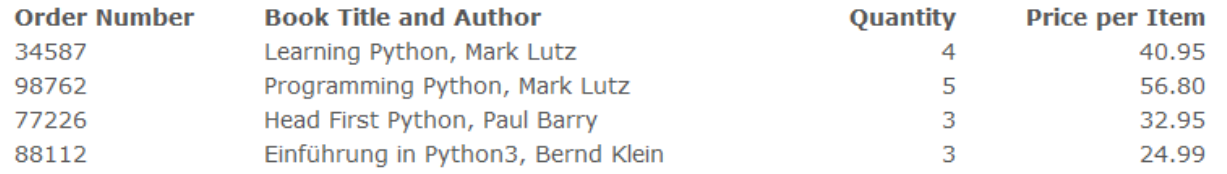
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

In [3]:
########### Solución
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

p=lambda x,y:x*y

def increase(value):
    if(value<100):
        value+=10
    return value

x=list(map(increase,[p(orders[i][2],orders[i][3]) for i in np.arange(len(orders))]))


result=list(map(lambda x,y: (x[0],y),orders,x))
result

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

### Forma alternativa

In [4]:
min_order = 100
invoice_totals = list(map(lambda x: x if x[1] >= min_order else (x[0], x[1] + 10), 
                 map(lambda x: (x[0],x[2] * x[3]), orders)))
print(invoice_totals)


[('34587', 163.8), ('98762', 284.0), ('77226', 108.85000000000001), ('88112', 84.97)]


7. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`.

In [2]:
########### Solución
orders = [ [1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
           [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
           [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]




[[1, 688.3299999999999], [2, 504.46000000000004], [3, 374.79999999999995], [4, 502.57]]
